# 🎯 Gold Price Prediction with LightGBM
**Name**: Hugo Bassaget
**Student ID**: 675 404 600 80

In [16]:
!pip install yfinance lightgbm scikit-learn pandas matplotlib

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime

df = pd.read_csv('/content/Merged_Gold_dataset.csv')
df.head()


,Unnamed: 0,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.1,65.9,12767.286,54.055710,153.7,5.2,100.3446,100.4980
1,1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.1,65.9,12767.286,54.055710,153.7,5.2,100.3446,100.4980
2,2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.1,65.9,12767.286,54.055710,153.7,5.2,100.3446,100.4980
3,3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.7,66.1,12922.656,68.682759,155.0,5.2,100.2931,100.5254
4,4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.7,66.1,12922.656,68.682759,155.0,5.2,100.2931,100.5254


In [18]:
# 1.
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# 2.
data = yf.download('GLD', start='2010-01-01', end='2024-12-31')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2010-01-04,109.800003,110.139999,109.309998,109.820000,16224100
2010-01-05,109.699997,110.389999,109.260002,109.879997,14213100
2010-01-06,111.510002,111.769997,110.410004,110.709999,24981900
2010-01-07,110.820000,111.290001,110.620003,111.070000,13609800
2010-01-08,111.370003,111.580002,110.260002,111.519997,15894600


In [20]:
# 3.
data['SMA_14'] = data['Close'].rolling(window=14).mean()

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI_14'] = compute_rsi(data['Close'])

In [21]:
# 4.
data = data.dropna()
data.columns = [str(col).replace(' ', '_').replace('(', '').replace(')', '')
                .replace("'", '').replace('"', '') for col in data.columns]
print(list(data.columns))

['Close,_GLD', 'High,_GLD', 'Low,_GLD', 'Open,_GLD', 'Volume,_GLD', 'SMA_14,_', 'RSI_14,_']


In [22]:
for col in data.columns:
    print(f"- {col} -")


- Close,_GLD -
- High,_GLD -
- Low,_GLD -
- Open,_GLD -
- Volume,_GLD -
- SMA_14,_ -
- RSI_14,_ -


In [23]:
# 5.
X = data.drop(columns=['Close,_GLD'])
y = data['Close,_GLD']



In [24]:
# 6.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 7.
clean_columns = [str(col).replace(',', '').replace('"', '').replace("'", '') for col in X.columns]
X.columns = clean_columns
X_train.columns = clean_columns
X_test.columns = clean_columns

# train
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 6
[LightGBM] [Info] Start training from score 146.574545


LGBMRegressor()

In [26]:
# 8.
y_pred = model.predict(X_test)

In [27]:
# 9.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MSE: 0.5268612806681819
RMSE: 0.7258521066086272
MAE: 0.47887202903811227
R2 Score: 0.9994833763088803


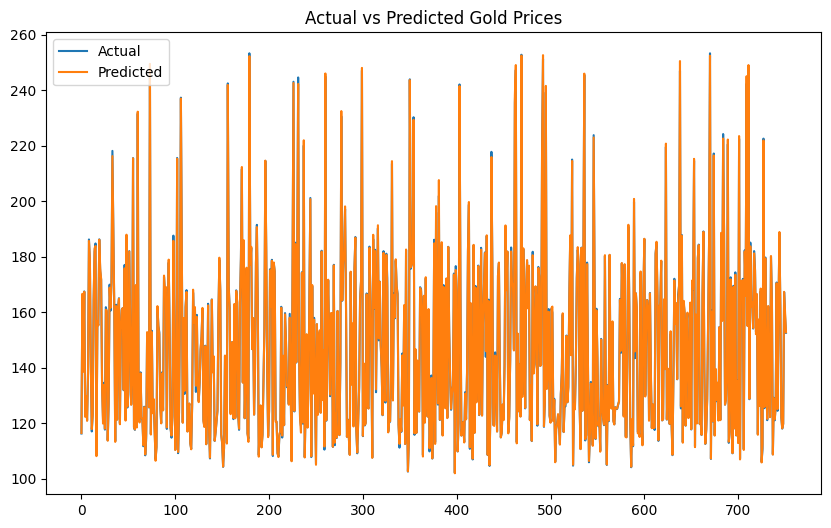

In [28]:
# 10.
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Gold Prices')
plt.show()